## Music Mood Classification: Part 2 Supervised Learning 

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [9]:
# import csv 
df = pd.read_csv('/Users/ankitsolanki/Desktop/Brainstation/Capstone/tracks_moods.csv')
num_moods = pd.read_csv('/Users/ankitsolanki/Desktop/Brainstation/Capstone/num_moods.csv')

In [4]:
df.head()

,playList,artist,explicit,id,popularity,title,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,moods
0,3,"R.I.O., U-Jean",0,79MkbP0nYwH5LG9fzwuCjZ,29,Animal - Video Edit,0.865,0.4530,128.037,0.0412,0.00929,0.000000,4,0.620,0,212467,0.912892,0.555,0,cheerful
1,3,"Mike Candys, Jenson Vaughan",0,3nay4trOaT3jnPCreU5BIO,5,Bring Back The Love - Radio Edit,0.816,0.2230,127.982,0.0616,0.01090,0.000058,4,0.606,5,196293,0.927914,0.476,1,cheerful
2,3,Angus & Julia Stone,0,2fbXJ0VpxhW7j0qcg1DnoZ,61,Big Jet Plane,0.376,0.0908,109.944,0.0267,0.25200,0.008610,4,0.766,10,239120,0.848102,0.257,0,chill
3,3,MGMT,0,3FtYbEfBqAlGO46NUDQSAt,78,Electric Feel,0.807,0.3480,103.038,0.0350,0.07140,0.280000,3,0.763,1,229640,0.929119,0.559,1,uplifting
4,3,Britney Spears,0,5cCAZS9VhLGEDV4NCfieeg,65,I Wanna Go,0.546,0.3320,130.002,0.0414,0.00379,0.000004,4,0.696,5,210267,0.882304,0.787,1,uplifting


In [5]:
# Check mood classes
df['moods'].value_counts()


uplifting     10872
cheerful       8295
chill          7568
melancholy     4798
Name: moods, dtype: int64

In [81]:
X_df = df.drop(['moods'],axis=1)
y_df = df['moods']

For multi-class classfication I will be using the numerical dataframe that I have created earlier in Part 1.

In [10]:
num_moods.head()

,playList,explicit,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,moods
0,0.6,0,0.29,0.865,0.4530,0.533568,0.0412,0.00929,0.000000,0.8,0.620,0.000000,0.104698,0.912892,0.555,0,0
1,0.6,0,0.05,0.816,0.2230,0.533338,0.0616,0.01090,0.000058,0.8,0.606,0.454545,0.096446,0.927914,0.476,1,0
2,0.6,0,0.61,0.376,0.0908,0.458169,0.0267,0.25200,0.008610,0.8,0.766,0.909091,0.118295,0.848102,0.257,0,2
3,0.6,0,0.78,0.807,0.3480,0.429389,0.0350,0.07140,0.280000,0.6,0.763,0.090909,0.113459,0.929119,0.559,1,1
4,0.6,0,0.65,0.546,0.3320,0.541756,0.0414,0.00379,0.000004,0.8,0.696,0.454545,0.103575,0.882304,0.787,1,1


Since the data is already scaled and normalised there is no need for firther processing.

## Modeling 

I will be using KNN, SVM and Random forest models to classify the moods.

In [53]:
# Set X and y
X = num_moods.drop(['moods'],axis=1)
y = num_moods['moods']

In [54]:
# split the data into train , test and validation set  
from sklearn.model_selection import train_test_split

# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2,
                     random_state=1)

In [55]:
# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=1)

Final proportions:

- Test Set: 0.2

- Validation Set: 0.8 * 0.3 = 0.24

- Training Set: 0.8 * 0.7 = 0.56

**K Nearest Neighbors**

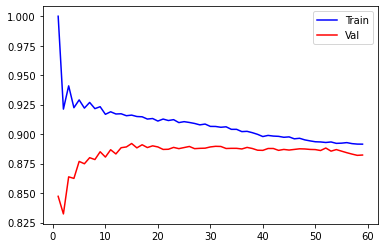

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1,60))
train_scores = []
val_scores = []


for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    #score
    train_scores.append(knn.score(X_train,y_train))
    val_scores.append(knn.score(X_validation, y_validation))
    




plt.figure()
plt.plot(k_values, train_scores, label='Train', c='blue')
plt.plot(k_values, val_scores, label='Val', c='red')
plt.legend()
plt.show()

I will take 16 n_neighbors. 

In [56]:
# refit KNN with k_value = 16
final_knn = KNeighborsClassifier(n_neighbors=16)
final_knn.fit(X_remainder, y_remainder)

# test scores
print(f'KNN train score: {final_knn.score(X_remainder,y_remainder)}')
print(f'KNN test score: {final_knn.score(X_test,y_test)}')

KNN train score: 0.9205581542852612
KNN test score: 0.9034406215316315


This is promising. Let's do a cross-validation as models can overfit the data sometimes. 

In [57]:
# cross validation k folds
from sklearn.model_selection import cross_val_score

#instantiate 
knn = KNeighborsClassifier(n_neighbors=16)

## 2. Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
cv_scores = cross_val_score(knn, X_remainder, y_remainder, cv = 5)
print(scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.89813714 0.89098117 0.89236868 0.89494549 0.89078295]
cv_scores mean:0.8934430867338621


In [75]:
from sklearn.metrics import classification_report, confusion_matrix 
knn.fit(X_test,y_test)
# classification report for KNN
predictions = knn.predict(X_test) 
print(classification_report(y_test, predictions)) 
print("---------------------------------------------------")

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1614
           1       0.91      0.95      0.93      2126
           2       0.86      0.83      0.85      1562
           3       0.99      0.87      0.93      1005

    accuracy                           0.89      6307
   macro avg       0.90      0.89      0.89      6307
weighted avg       0.90      0.89      0.89      6307

---------------------------------------------------


The f1 score is satisfactory but it will make more sense after comparison with other models.

**Support Vector Machines**

In [86]:
# We split the data again in train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.3,random_state=101)

In [61]:
#import svc
from sklearn.svm import LinearSVC

SVM_model = LinearSVC()
SVM_model.fit(X_train2, y_train2)

print(f"The TRAIN classification accuracy is: {SVM_model.score(X_train2,y_train2)}")
print(f"The TEST classification accuracy is: {SVM_model.score(X_test2,y_test2)}")

The TRAIN classification accuracy is: 0.940107824038418
The TEST classification accuracy is: 0.9404862579281184


I will do a gridseacrh for hyperparameter tuning. 

In [39]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000]}  
  
grid = GridSearchCV(LinearSVC(), param_grid, refit = True,) 
  
# fitting the model for grid search 
grid.fit(X_train2, y_train2) 

/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ankitsola

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [40]:
print(grid.best_params_) 
  

{'C': 10}


In [62]:
# refit svc with C = 10
SVM_model = LinearSVC(C=10)
SVM_model.fit(X_train2, y_train2)

print(f"The TRAIN classification accuracy is: {SVM_model.score(X_train2,y_train2)}")
print(f"The TEST classification accuracy is: {SVM_model.score(X_test2,y_test2)}")

The TRAIN classification accuracy is: 0.9418746885335024
The TEST classification accuracy is: 0.9418604651162791


/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Let's do a cross validation for SVC

In [44]:
#instantiate 
SVM_model = LinearSVC(C=10)
## 2. Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
cv_scores = cross_val_score(SVM_model, X_train2, y_train2, cv = 5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.93657984 0.94405436 0.94496036 0.93883099 0.93905754]
cv_scores mean:0.9406966200922525


/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [95]:
#Evaluate
SVM_model.fit(X_test2,y_test2)
# classification report for SVM
predictions_svm = SVM_model.predict(X_test2) 
print(classification_report(y_test2, predictions_svm)) 

              precision    recall  f1-score   support

    cheerful       0.93      0.91      0.92      2500
       chill       0.93      0.88      0.90      2259
  melancholy       0.97      0.99      0.98      1450
   uplifting       0.96      0.99      0.97      3251

    accuracy                           0.94      9460
   macro avg       0.94      0.94      0.94      9460
weighted avg       0.94      0.94      0.94      9460



/Users/ankitsolanki/opt/anaconda3/envs/musicmood/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


So Far SVM has the best accuracy score.

Let's try random forests classifier 

**Random Forests Classifier**

In [67]:
# Split the data into train ,test and validation
# Taking a chuck for our 20% test set
X_remainder3, X_test3, y_remainder3, y_test3 = train_test_split(X, y, test_size = 0.2,
                     random_state=42)

# Splitting the remainder in two chunks
X_train3, X_validation3, y_train3, y_validation3 = train_test_split(X_remainder, y_remainder, test_size = 0.3,
                     random_state=42)

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and fit our random forest
rf = RandomForestClassifier()

rf.fit(X_train3, y_train3)

print(rf.score(X_train3, y_train3))
print(rf.score(X_test3, y_test3))

1.0
0.9890597748533375


Cross Validation 

In [49]:
# Let's try it with Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores = []

# Try random forests of size 1 to 100
for n in range(1, 100):
    rf = RandomForestClassifier(n_estimators = n)
    # Use cross validation to fit the forest
    cv_score = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
    cv_scores.append(cv_score)

In [51]:

print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cv_scores mean:0.9651440173243978


These scores are very impressive.

In [93]:
#Evaluate
rf.fit(X_test3,y_test3)
# classification report for SVM
predictions_svm = rf.predict(X_test3) 
print(classification_report(y_test3, predictions_rf)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1663
           1       0.99      0.99      0.99      2169
           2       0.98      0.99      0.99      1500
           3       0.99      0.99      0.99       975

    accuracy                           0.99      6307
   macro avg       0.99      0.99      0.99      6307
weighted avg       0.99      0.99      0.99      6307



## Confusion Matrix Evaluation

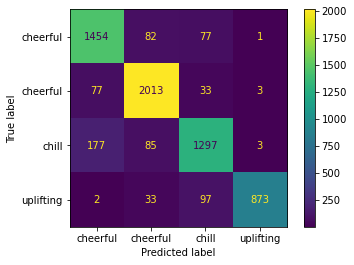

In [91]:
# confusion matrix KNN
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, predictions )
ConfusionMatrixDisplay(conf_matrix, display_labels=y_df).plot()

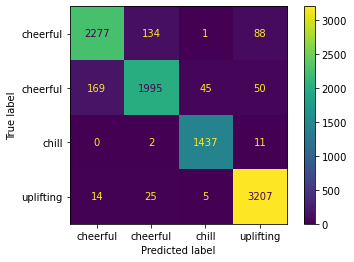

In [97]:
# confusion matrix SVM
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test2, predictions_svm )
ConfusionMatrixDisplay(conf_matrix, display_labels=y_df).plot()

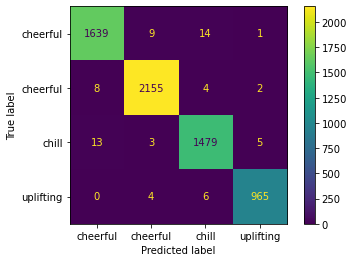

In [90]:
# confusion matrix RF
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test3, predictions_rf )
ConfusionMatrixDisplay(conf_matrix, display_labels=y_df).plot()

We can see from the confsuion matrixes of all three models, that random forests have the least amount of errors among all. Although SVM is still very close but random forests classifies the moods the best. Also looking at the F1 scores of all models, it proves that random forests will work best for this multi class classification problem.

**Production:**

- Get song features for each song in a spotify playlist
- get audio attributes
- scale audio attributes
- Predict song moods
- Use count of moods to visualize in D3/Flask